In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import numpy as np

In [2]:
ls

2_16:58_data.csv       blue_slow_6_15:33_data.csv  Calibration.ipynb
blue_6_15:38_data.csv  blue_slow_6_15:35_data.csv  Calibration.pdf


In [8]:
hallRaw_df = pd.read_csv('blue_6_15:38_data.csv', header = None)

In [9]:
hallRaw_df.rename(columns={0: 'time_ros', 1: 'time',  2:'witt', 3:'hall', 4:'poss'}, inplace=True)


In [10]:
hallRaw_df.head

<bound method NDFrame.head of            time_ros   time      witt      hall    poss
0      1.678095e+09      0  0.217832  0.839996  0.0000
1      1.678095e+09      1  0.217832  0.839996  5.9999
2      1.678095e+09      2  0.169115  0.820007  5.9998
3      1.678095e+09      3  0.208755  0.839996  5.9997
4      1.678095e+09      4  0.219193  0.820007  5.9996
...             ...    ...       ...       ...     ...
79995  1.678096e+09  29995  0.262942  0.220001  3.9995
79996  1.678096e+09  29996  0.295940  0.220001  3.9996
79997  1.678096e+09  29997  0.310979  0.179993  3.9997
79998  1.678096e+09  29998  0.259520  0.179993  3.9998
79999  1.678096e+09  29999  0.252736  0.260010  3.9999

[80000 rows x 5 columns]>

In [20]:
hall = abs(hallRaw_df['hall'])
witt= abs(hallRaw_df['witt'])
poss = abs(hallRaw_df['poss'])
new_time = list(range(0,len(hallRaw_df['time'])))
time = new_time

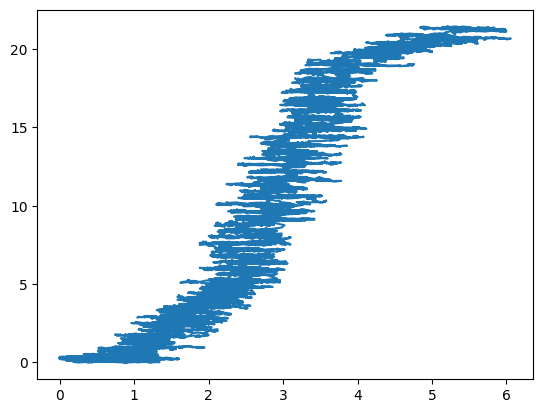

In [17]:
plot(hall,witt)

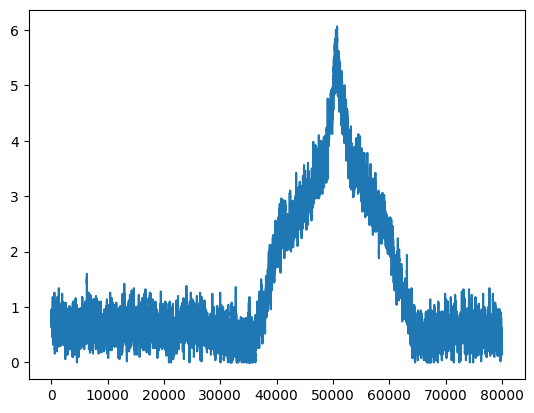

In [19]:
plot(time,hall)

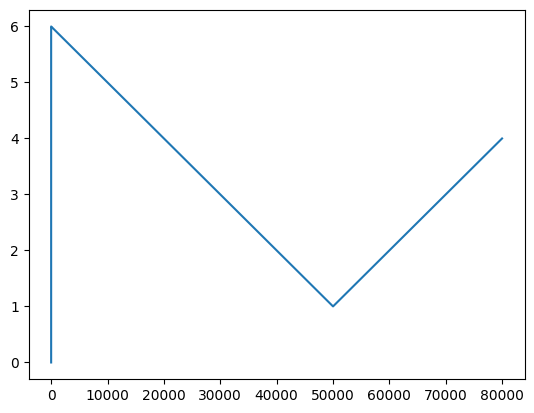

In [21]:
plot(time,poss)

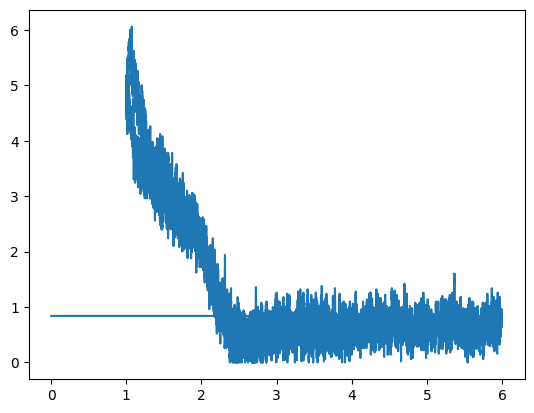

In [22]:
plot(poss, hall)

Text(0.5, 1.0, 'Witt vs Time')

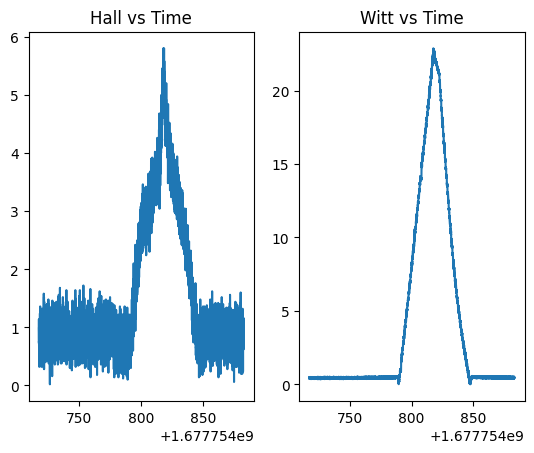

In [36]:
figure, axis = plt.subplots(1,2)

axis[0].plot(time,hall)
axis[0].set_title("Hall vs Time")
  
# For Cosine Function
axis[1].plot(time, witt)
axis[1].set_title("Witt vs Time")

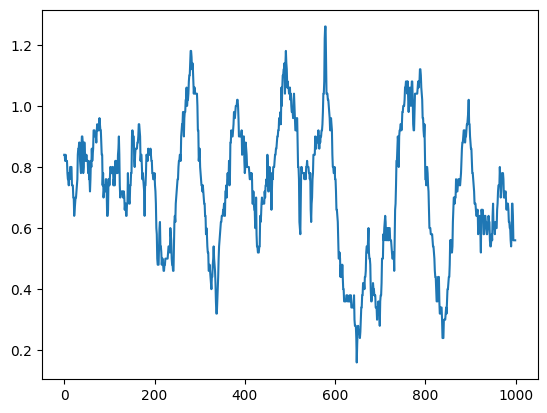

In [24]:
plt.plot(time[:1000],hall[:1000])

### Bandpass filter

In [23]:
from scipy.signal import butter,filtfilt
T = 20         # Sample Period
fs = 495.0       # sample rate, Hz
cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [25]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

Text(0.5, 1.0, 'Filtered vs Time')

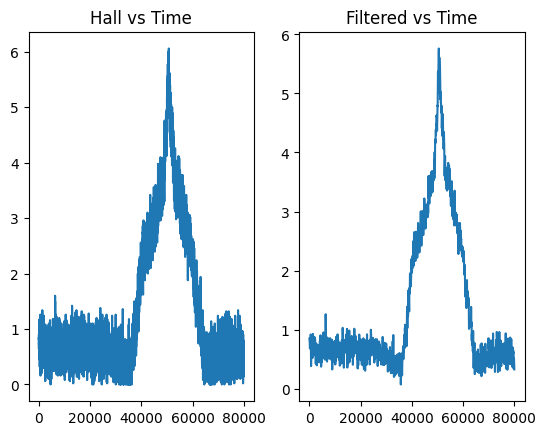

In [35]:
hall_filtered = butter_lowpass_filter(hall, cutoff, fs, order)
figure, axis = plt.subplots(1,2)

axis[0].plot(time,hall)
axis[0].set_title("Hall vs Time")
  
# For Cosine Function
axis[1].plot(time, hall_filtered)
axis[1].set_title("Filtered vs Time")

In [12]:
# hallRaw_df['hall'] = hall_filtered
# time = np.arange(0, len(hall_filtered), 1, dtype=int)
# hallRaw_df['time'] = time

Text(0.5, 1.0, 'Witt vs Time')

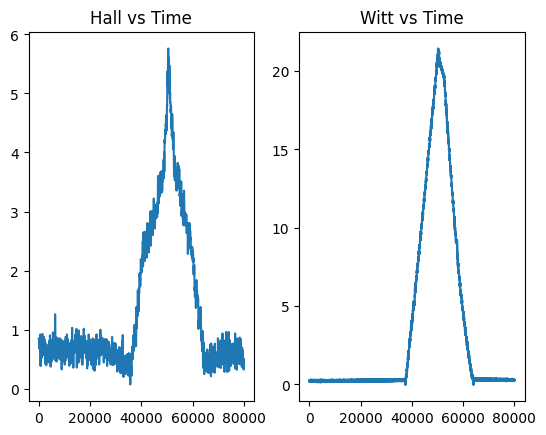

In [34]:
figure, axis = plt.subplots(1,2)

axis[0].plot(time,hall_filtered)
axis[0].set_title("Hall vs Time")
  
# For Cosine Function
axis[1].plot(time, witt)
axis[1].set_title("Witt vs Time")

### Savitzky-Golay Filter


In [37]:
from scipy import signal

hall_sgf = signal.savgol_filter(hall_filtered,
                           550, # window size used for filtering
                           2), # order of fitted polynomial
len(hall_sgf)

1

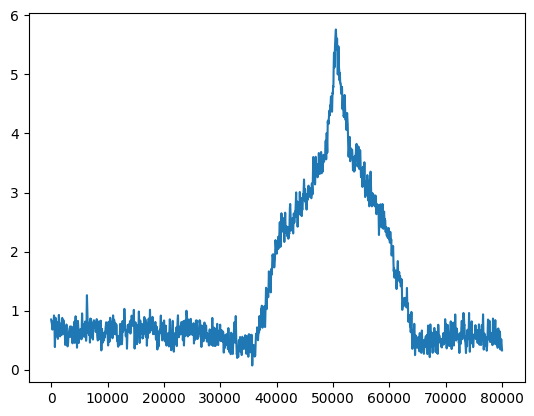

In [29]:
plot(time, hall_filtered)

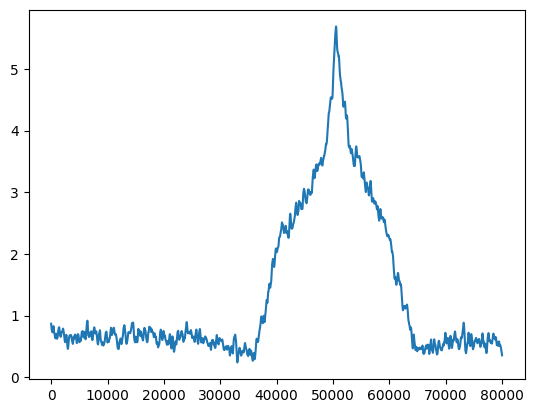

In [30]:
plot(time, hall_sgf[0])

Text(0, 0.5, 'Wittenstein')

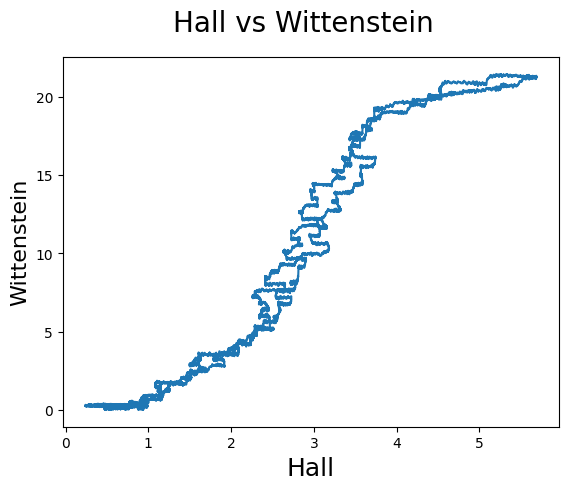

In [31]:
fig = plt.figure()
plot(hall_sgf[0],witt)
fig.suptitle("Hall vs Wittenstein", fontsize=20)
plt.xlabel('Hall', fontsize=18)
plt.ylabel('Wittenstein', fontsize=16)

Text(0, 0.5, 'Hall')

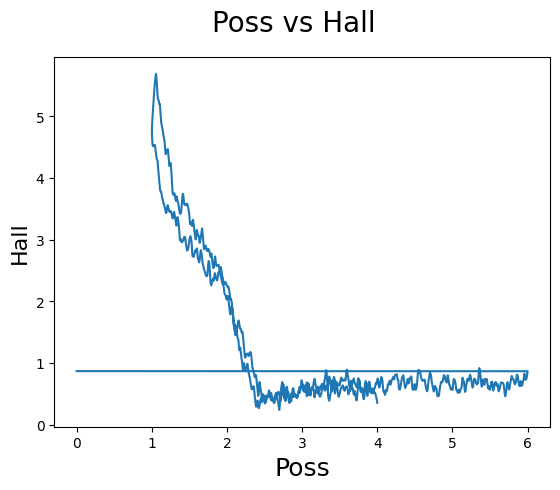

In [33]:
fig = plt.figure()
plot(poss,hall_sgf[0])
fig.suptitle("Poss vs Hall", fontsize=20)
plt.xlabel('Poss', fontsize=18)
plt.ylabel('Hall', fontsize=16)